# Graph Colouring
The following notebook finds colourings for graphs using Gröbner bases. We implement the *graph polynomial method* and the *roots of unity method*.

In [1]:
from sympy import *
import networkx as nx
import matplotlib.pyplot as plt
from mpmath import cplot

In [24]:
# generate random graph (Erdos-Renyi graph)
G = nx.fast_gnp_random_graph(6,0.5)

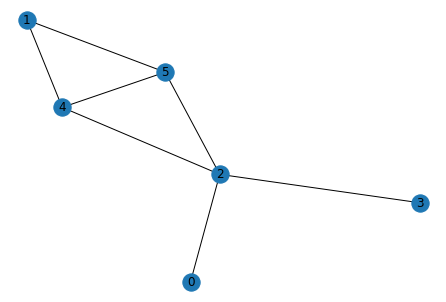

In [25]:
nx.draw(G, with_labels=True)

In [26]:
# initialise variables to solve for and gets edge pairs
var('x')
vertices = [Symbol('x' + str(i)) for i in list(G.nodes)]
edges = [(vertices[i], vertices[j]) for i, j in list(G.edges)]

---
---

## Graph Polynomial Method

Fix $k$. Then $G$ is $k$-colourable if and only if $f_G\notin I$. We use $k=3$ for these examples.

In [27]:
# determine if G is k-colourable
k = 3

# initialises generators of ideal for the given graph
ideal_gp = []
for x in vertices:
    ideal_gp.append(x**3-1)

# graph polyomial
f_G = 1
for u,v in edges:
    f_G *= (u-v)

ideal_gp_groebner = groebner(ideal_gp)

ideal_gp_groebner.contains(f_G)

False

---
---

## Roots of Unity Method

In [28]:
# initialises generators of ideal for the given graph
ideal_roi = []
for x in vertices:
    ideal_roi.append( x**3 -1 )
for u,v in edges:
    ideal_roi.append( u**2 + u*v + v**2)
g_basis_roi = groebner(ideal_roi)

In [29]:
# verify that g_basis is non-trivial
g_basis_roi != [1]

True

In [30]:
list(g_basis_roi)

[x0**2 - x0*x4 - x0*x5 + x4*x5,
 x1 + x4 + x5,
 x2 + x4 + x5,
 x3**2 - x3*x4 - x3*x5 + x4*x5,
 x4**2 + x4*x5 + x5**2,
 x5**3 - 1]

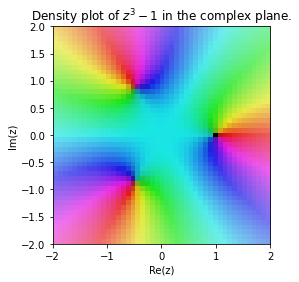

In [31]:
# visualise roots of x^3-1

fig = plt.figure()
axes = fig.add_subplot(111)
axes.set_title(r"Density plot of $z^3 - 1$ in the complex plane.")

cplot(lambda z: z**3 - 1, re=[-2, 2], im=[-2, 2], axes=axes)

In [32]:
# initialise cube roots of unity
unityroots = roots(x**3 - 1, multiple=True)
unityroots

[1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]

In [33]:
# initialise colour variables to make reading colouring solution easier
colour_variables = var('red,green,blue')

In [34]:
# solves for colourings
colourings = solve(g_basis_roi, vertices)

In [35]:
# prints possible graph colourings
for colouring in colourings:
    colour_list = [colour.expand(complex=True).subs(zip(unityroots, colour_variables)) for colour in colouring]
    print(colour_list)

[red, green, green, red, red, -green - 1]
[red, green, green, red, -green - 1, red]
[red, green, green, -green - 1, red, -green - 1]
[red, green, green, -green - 1, -green - 1, red]
[red, -green - 1, -green - 1, red, red, green]
[red, -green - 1, -green - 1, red, green, red]
[red, -green - 1, -green - 1, green, red, green]
[red, -green - 1, -green - 1, green, green, red]
[green, red, red, green, green, -green - 1]
[green, red, red, green, -green - 1, green]
[green, red, red, -green - 1, green, -green - 1]
[green, red, red, -green - 1, -green - 1, green]
[green, -green - 1, -green - 1, red, red, green]
[green, -green - 1, -green - 1, red, green, red]
[green, -green - 1, -green - 1, green, red, green]
[green, -green - 1, -green - 1, green, green, red]
[-green - 1, red, red, green, green, -green - 1]
[-green - 1, red, red, green, -green - 1, green]
[-green - 1, red, red, -green - 1, green, -green - 1]
[-green - 1, red, red, -green - 1, -green - 1, green]
[-green - 1, green, green, red, re

Note that `-green-1=1/2 + sqrt(3)*I/2 - 1 = -1/2 + sqrt(3)*I/2 = blue`.